# Covid-19 Dataset

## Here I am going to explore and analyze the data of covid-19 data using pandas and answer some qeustions

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
data = pd.read_csv('D:\Data Science Training\Data Analysis Projects\covid_19_data\covid_19_data.csv')
data

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7
...,...,...,...,...,...,...
316,4/29/2020,Wyoming,US,545,7,0
317,4/29/2020,Xinjiang,Mainland China,76,3,73
318,4/29/2020,Yukon,Canada,11,0,0
319,4/29/2020,Yunnan,Mainland China,185,2,181


### 1) First i will explore the data

In [2]:
data.count()

Date         321
State        140
Region       321
Confirmed    321
Deaths       321
Recovered    321
dtype: int64

In [3]:
data.isnull().sum()

Date           0
State        181
Region         0
Confirmed      0
Deaths         0
Recovered      0
dtype: int64

<AxesSubplot:>

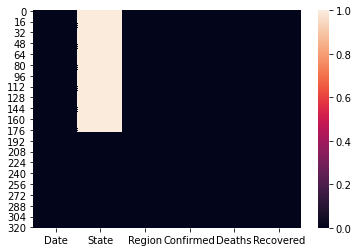

In [4]:
sns.heatmap(data.isnull())

#showing Nan values on heatmap

### 2) lets try to find Confirmed & recovered cases per region

In [5]:
data.head()

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7


In [6]:
data.groupby('Region')['Confirmed','Recovered'].sum()

<ipython-input-6-20fd7b835859>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby('Region')['Confirmed','Recovered'].sum()


,Confirmed,Recovered
Region,,
Afghanistan,1939,252
Albania,766,455
Algeria,3848,1702
Andorra,743,423
Angola,27,7
...,...,...
West Bank and Gaza,344,71
Western Sahara,6,5
Yemen,6,1


### 2) remove all the records where confirmed cases is less than 10

In [7]:
data = data[~(data.Confirmed < 10)]  
data

# removing records satisfying a particular condition

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7
...,...,...,...,...,...,...
316,4/29/2020,Wyoming,US,545,7,0
317,4/29/2020,Xinjiang,Mainland China,76,3,73
318,4/29/2020,Yukon,Canada,11,0,0
319,4/29/2020,Yunnan,Mainland China,185,2,181


### 3) in which region, maximum number of confirmed cases were recorded ?

In [8]:
data.groupby('Region').Confirmed.sum().sort_values(ascending=False)

# US has the most confirmed cases

Region
US            1039909
Spain          236899
Italy          203591
France         166536
UK             166432
               ...   
Seychelles         11
Burundi            11
Holy See           10
Gambia             10
Suriname           10
Name: Confirmed, Length: 180, dtype: int64

In [9]:
data.groupby('Region').Confirmed.sum().sort_values(ascending=True)

# Suriname has the least confirmed cases

Region
Suriname           10
Gambia             10
Holy See           10
Burundi            11
Seychelles         11
               ...   
UK             166432
France         166536
Italy          203591
Spain          236899
US            1039909
Name: Confirmed, Length: 180, dtype: int64

### 4) in which region, minimum number of Deaths cases were recorded ?

In [10]:
data.groupby('Region').Deaths.sum().sort_values(ascending=True)

Region
Cambodia                        0
Seychelles                      0
Saint Lucia                     0
Central African Republic        0
Saint Kitts and Nevis           0
                            ...  
France                      24121
Spain                       24275
UK                          26165
Italy                       27682
US                          60967
Name: Deaths, Length: 180, dtype: int64

### 5) How many Confirmed, Deaths & recovered cases were reported from india till 29 April 2020 ?

In [14]:
data[data.Region == 'India'].sum()

Date         4/29/2020
State                0
Region           India
Confirmed        33062
Deaths            1079
Recovered         8437
dtype: object

### 6) Sort entire data with number of confirmed cases in ascending order 

In [18]:
data.sort_values(by = ['Confirmed'])

,Date,State,Region,Confirmed,Deaths,Recovered
156,4/29/2020,NaN,Suriname,10,1,8
70,4/29/2020,NaN,Holy See,10,0,2
59,4/29/2020,NaN,Gambia,10,1,8
318,4/29/2020,Yukon,Canada,11,0,0
217,4/29/2020,Greenland,Denmark,11,0,11
...,...,...,...,...,...,...
57,4/29/2020,NaN,France,165093,24087,48228
168,4/29/2020,NaN,UK,165221,26097,0
80,4/29/2020,NaN,Italy,203591,27682,71252
153,4/29/2020,NaN,Spain,236899,24275,132929


### 7) Sort entire data with number of recovered cases in descending order

In [20]:
data.sort_values(by = ['Confirmed'], ascending = False)

,Date,State,Region,Confirmed,Deaths,Recovered
265,4/29/2020,New York,US,299691,23477,0
153,4/29/2020,NaN,Spain,236899,24275,132929
80,4/29/2020,NaN,Italy,203591,27682,71252
168,4/29/2020,NaN,UK,165221,26097,0
57,4/29/2020,NaN,France,165093,24087,48228
...,...,...,...,...,...,...
144,4/29/2020,NaN,Seychelles,11,0,6
27,4/29/2020,NaN,Burundi,11,1,4
59,4/29/2020,NaN,Gambia,10,1,8
156,4/29/2020,NaN,Suriname,10,1,8
